# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [14]:
import pandas as pd
import collections
from collections import Counter
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [7]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
location = r'E:\python4\1211OfDataFrame\chipotle.tsv'
chipo = pd.read_csv(location,sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

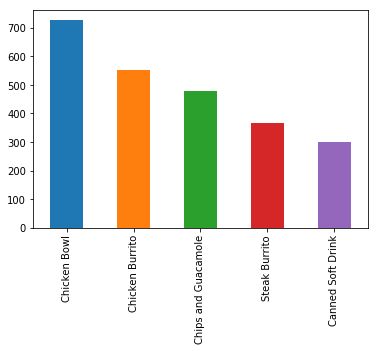

In [26]:
x = chipo.item_name
letter_counts = Counter(x)
letter_counts
pd.DataFrame.from_dict(letter_counts,orient = 'index')[0].sort_values(ascending = False).head(5).plot(kind = 'bar')

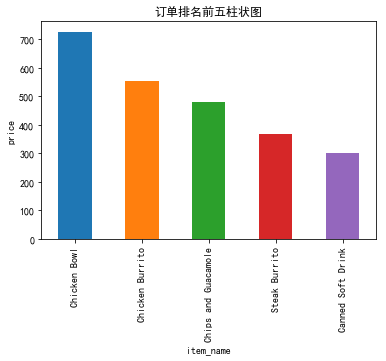

In [30]:
s = chipo.item_name.value_counts().head(5)
s.plot(kind = 'bar')
plt.xlabel('item_name')
plt.ylabel('price')
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title('订单排名前五柱状图')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [8]:
chipo.item_price = [float(x[1:]) for x in chipo.item_price]

s2 = chipo.groupby('order_id').sum()


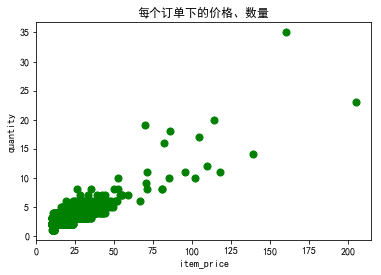

In [50]:
plt.scatter(s2.item_price,s2.quantity,s = 50,c = 'g')
plt.xlabel('item_price')
plt.ylabel('quantity')
plt.title('每个订单下的价格、数量')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

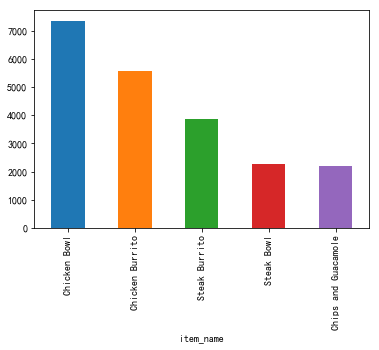

In [86]:
chipo.groupby('item_name')['item_price'].sum().sort_values(ascending = False).head().plot(kind = 'bar')

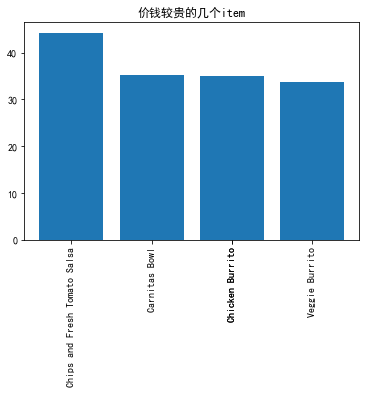

In [101]:
s = chipo.sort_values('item_price',ascending = False).head(5)
plt.bar(s.item_name,s.item_price)
plt.xticks(s.item_name,rotation = 'vertical')
plt.title('价钱较贵的几个item')
plt.show()
# plt.xlabel?

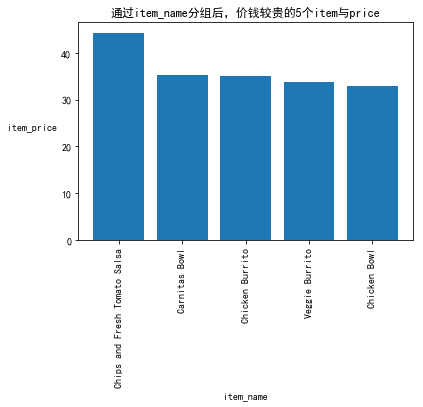

In [107]:
ss = chipo.groupby('item_name').max().sort_values('item_price',ascending = False).head()
plt.bar(ss.index,ss.item_price)
plt.xticks(ss.index,rotation = 'vertical')
plt.xlabel('item_name')
plt.ylabel('item_price',rotation = 'horizontal',horizontalalignment = 'right')
plt.title('通过item_name分组后，价钱较贵的5个item与price')
plt.show()

In [81]:
# help(plt.bar)

In [43]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


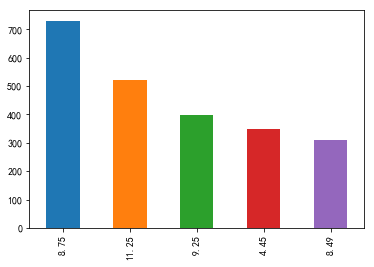

In [64]:
chipo.item_price.value_counts().head().plot(kind = 'bar')
plt.show()

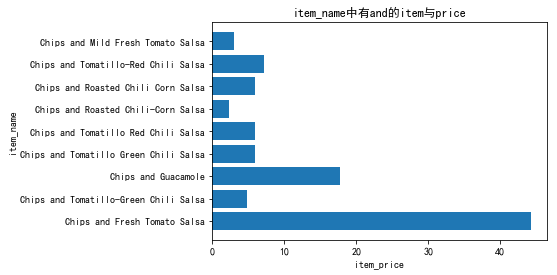

In [63]:
chipo_and = chipo[chipo.item_name.str.contains('and')]
ss = chipo_and[['item_name','item_price']].drop_duplicates()
plt.barh(ss.item_name,ss.item_price)
plt.xlabel('item_price')
plt.ylabel('item_name')
plt.title('item_name中有and的item与price')
plt.show()

In [71]:
chipo.groupby(['item_name']).apply(lambda x:x.sort_index())

order_id  quantity          item_name  \
item_name                                                       
6 Pack Soft Drink 298        129         1  6 Pack Soft Drink   
                  341        148         1  6 Pack Soft Drink   
                  357        154         1  6 Pack Soft Drink   
                  388        168         1  6 Pack Soft Drink   
                  417        182         1  6 Pack Soft Drink   
                  553        230         1  6 Pack Soft Drink   
                  639        264         1  6 Pack Soft Drink   
                  721        298         1  6 Pack Soft Drink   
                  743        306         1  6 Pack Soft Drink   
                  879        363         1  6 Pack Soft Drink   
                  1026       422         1  6 Pack Soft Drink   
                  1051       432         1  6 Pack Soft Drink   
                  1124       465         1  6 Pack Soft Drink   
                  1167       481         1  6 Pack Soft Drink   
                  1260       511         1  6 Pack Soft Drink   
                  1279       520         1  6 Pack Soft Drink   
                  1392       566         1  6 Pack Soft Drink   
                  1755       708         1  6 Pack Soft Drink   
                  1758       709         1  6 Pack Soft Drink   
                  1849       749         1  6 Pack Soft Drink   
                  1860       754         1  6 Pack Soft Drink   
                  1916       774         1  6 Pack Soft Drink   
                  1922       776         1  6 Pack Soft Drink   
                  1937       784         1  6 Pack Soft Drink   
                  1976       798         1  6 Pack Soft Drink   
                  2108       849         1  6 Pack Soft Drink   
                  2232       899         1  6 Pack Soft Drink   
                  2374       945         1  6 Pack Soft Drink   
                  2389       949         1  6 Pack Soft Drink   
                  2713      1076         1  6 Pack Soft Drink   
...                          ...       ...                ...   
Veggie Salad      2756      1094         1       Veggie Salad   
                  2996      1192         1       Veggie Salad   
                  3163      1263         1       Veggie Salad   
                  3471      1395         1       Veggie Salad   
                  4084      1635         1       Veggie Salad   
Veggie Salad Bowl 186         83         1  Veggie Salad Bowl   
                  295        128         1  Veggie Salad Bowl   
                  455        195         1  Veggie Salad Bowl   
                  496        207         1  Veggie Salad Bowl   
                  960        394         1  Veggie Salad Bowl   
                  1316       536         1  Veggie Salad Bowl   
                  1884       760         1  Veggie Salad Bowl   
                  2156       869         1  Veggie Salad Bowl   
                  2223       896         1  Veggie Salad Bowl   
                  2269       913         1  Veggie Salad Bowl   
                  2683      1066         1  Veggie Salad Bowl   
                  3223      1289         1  Veggie Salad Bowl   
                  3293      1321         1  Veggie Salad Bowl   
                  4109      1646         1  Veggie Salad Bowl   
                  4201      1677         1  Veggie Salad Bowl   
                  4261      1700         1  Veggie Salad Bowl   
                  4541      1805         1  Veggie Salad Bowl   
                  4573      1818         1  Veggie Salad Bowl   
Veggie Soft Tacos 738        304         1  Veggie Soft Tacos   
                  781        322         1  Veggie Soft Tacos   
                  1395       567         1  Veggie Soft Tacos   
                  1699       688         1  Veggie Soft Tacos   
                  2384       948         1  Veggie Soft Tacos   
                  2851      1132         1  Veggie Soft Tac